In [ ]:
'''Matplotlib:
This assignment is for visualization using matplotlib:
data to use:
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv
titanic = pd.read_csv(url)
Charts to plot:
1. Create a pie chart presenting the male/female proportion
2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender'''

In [1]:
#Import standard python modules

import numpy as np                        # Numpy Module
import pandas as pd                       # Pandas Module
import matplotlib.pyplot as mat_plt       # Matplotlib Module
import scipy.optimize as scipy_optimize   # Scipy Module

#Load Titanic data 
titanic=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')
titanic.head(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"


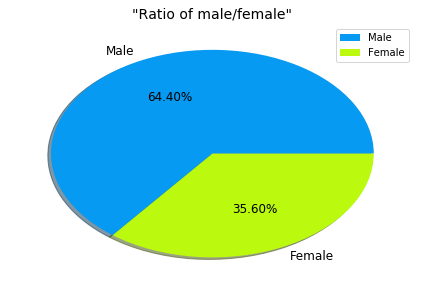

In [3]:
# Get the ratio of Male and female
ratio_male_female= titanic['sex'].value_counts( normalize = True )
#Pie chart for Male-Female ratio representation
labels=['Male','Female']
colors=['xkcd:azure','xkcd:yellowgreen']

patches, text , percentage =mat_plt.pie(ratio_male_female,  labels=labels, colors=colors,autopct='%1.2f%%',shadow=True)
#increase the size of text of pie chart and percentage
text[0].set_fontsize(12)
percentage[0].set_fontsize(12)
text[1].set_fontsize(12)
percentage[1].set_fontsize(12)

mat_plt.legend(patches, labels, loc=1)
mat_plt.tight_layout()
mat_plt.title('"Ratio of male/female"').set_fontsize(14)
mat_plt.show()

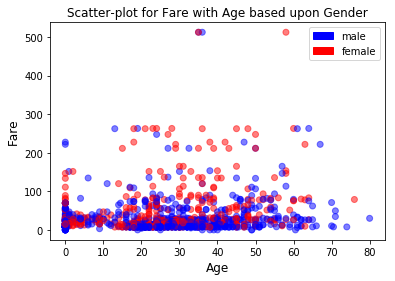

In [7]:
#Get data of sex, age , fare from titanic dataset

titanic_scatter=titanic[['sex','fare','age']].dropna( how = "all" ) #  remove NA /NaN if vailable in all columns


# identify NA / NaN values in for fare  and age columns
import numpy as np
index_fare = titanic_scatter['fare'].index[titanic_scatter['fare'].apply(np.isnan)]
index_age = titanic_scatter['age'].index[titanic_scatter['age'].apply(np.isnan)]
titanic_scatter.iloc[index_age]
titanic_scatter.iloc[index_fare]


# fill NA/ NaN with Zero (0.0) for fare  and age columns

titanic_scatter[['fare', 'age']] = titanic_scatter[['fare', 'age']].fillna(value=0)

# Generate Plot 

mapping = {'male' : 'blue', 'female' : 'red'}

red_patch = mpatches.Patch(color='blue', label=list(mapping.keys())[0])
blue_patch = mpatches.Patch(color='red', label=list(mapping.keys())[1])

import matplotlib.patches as mpatches

mat_plt.scatter(titanic_scatter['age'],  titanic_scatter['fare'], alpha=0.5, c=titanic_scatter['sex'].map(mapping), label=mapping)

mat_plt.title('Scatter-plot for Fare with Age based upon Gender').set_fontsize(12)
mat_plt.xlabel('Age').set_fontsize(12)
mat_plt.ylabel('Fare').set_fontsize(12)
mat_plt.legend(handles=[red_patch,blue_patch] , loc=0)
mat_plt.show()